[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: A persons favorite color
Quantitative: A persons hight in inches
Discrete: The number of children in a family
Continuous: The time it takes to run a 10k

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions. 

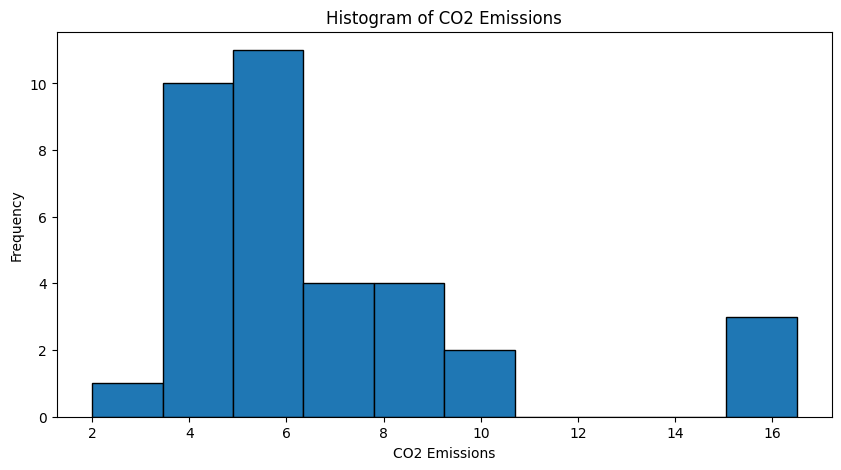

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title('Histogram of CO2 Emissions')
plt.xlabel("CO2 Emissions")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [29]:
print("Mean:", carbon_west["CO2"].mean())
print("Median:", carbon_west["CO2"].median())
print("Standard Deviation:", carbon_west["CO2"].std())

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [30]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [31]:
murders = murders[murders["state"] != "DC"]  # Remove D.C.
print("Mean:", murders["murder"].mean())
print("Standard Deviation:", murders["murder"].std())

Mean: 4.874
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [32]:
print("Minimum:", murders["murder"].min())
print("First Quartile (Q1):", murders["murder"].quantile(0.25))
print("Median:", murders["murder"].median())
print("Third Quartile (Q3):", murders["murder"].quantile(0.75))
print("Maximum:", murders["murder"].max())

Minimum: 1.0
First Quartile (Q1): 2.625
Median: 4.85
Third Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [33]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

print("Mean:", murders["murder"].mean())
print("Median:", murders["murder"].median())
print("Minimum:", murders["murder"].min())
print("First Quartile (Q1):", murders["murder"].quantile(0.25))
print("Median:", murders["murder"].median())
print("Third Quartile (Q3):", murders["murder"].quantile(0.75))
print("Maximum:", murders["murder"].max())

Mean: 5.252941176470588
Median: 5.0
Minimum: 1.0
First Quartile (Q1): 2.6500000000000004
Median: 5.0
Third Quartile (Q3): 6.45
Maximum: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [34]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home. 

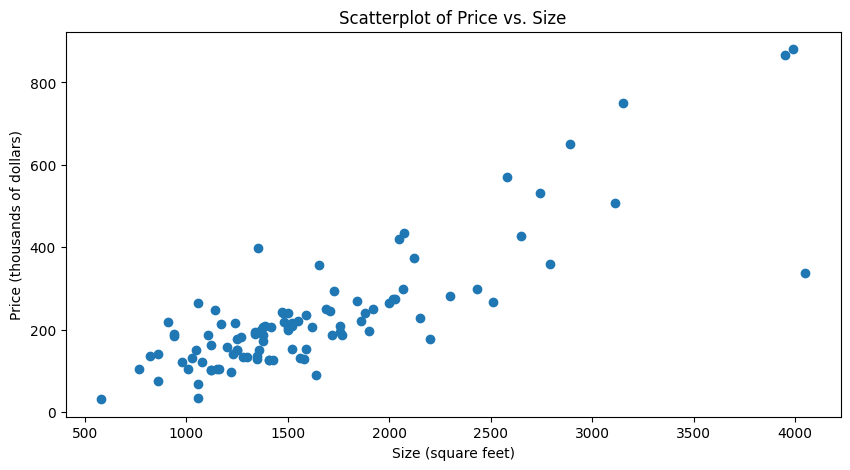

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(houses["size"], houses["price"])
plt.title('Scatterplot of Price vs. Size')
plt.xlabel("Size (square feet)")
plt.ylabel('Price (thousands of dollars)')
plt.show()

Part b. Find the correlation between the two variables.

In [36]:
print("Correlation:", houses["size"].corr(houses["price"]))

Correlation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot. 

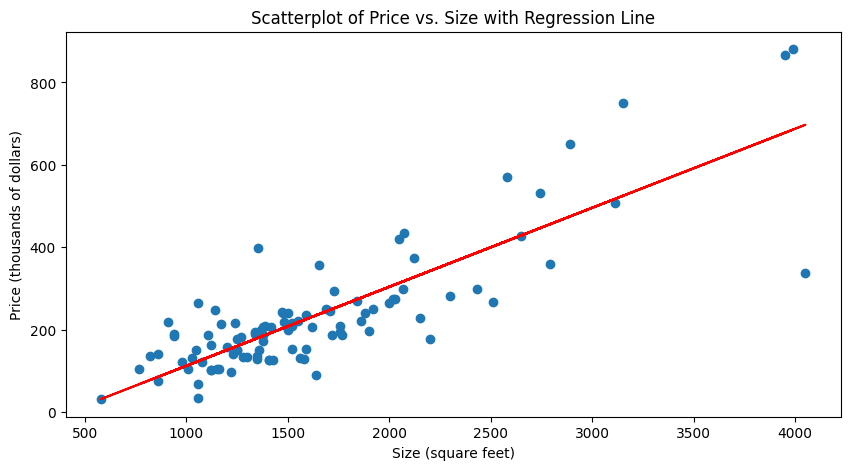

In [37]:
import numpy as np

x = houses["size"]
y = houses["price"]
slope = np.cov(x, y)[0][1] / np.var(x)
intercept = np.mean(y) - slope * np.mean(x)

regression_line = slope * x + intercept

plt.figure(figsize=(10, 5))
plt.scatter(houses["size"], houses["price"])
plt.plot(x, regression_line, color='red')
plt.title('Scatterplot of Price vs. Size with Regression Line')
plt.xlabel("Size (square feet)")
plt.ylabel('Price (thousands of dollars)')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

/var/folders/tr/hc37713j7lsc3vflx6r8kvnw0000gn/T/ipykernel_30629/823681230.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([houses_new, houses_old], vert=False, labels=["New", "Not New"])


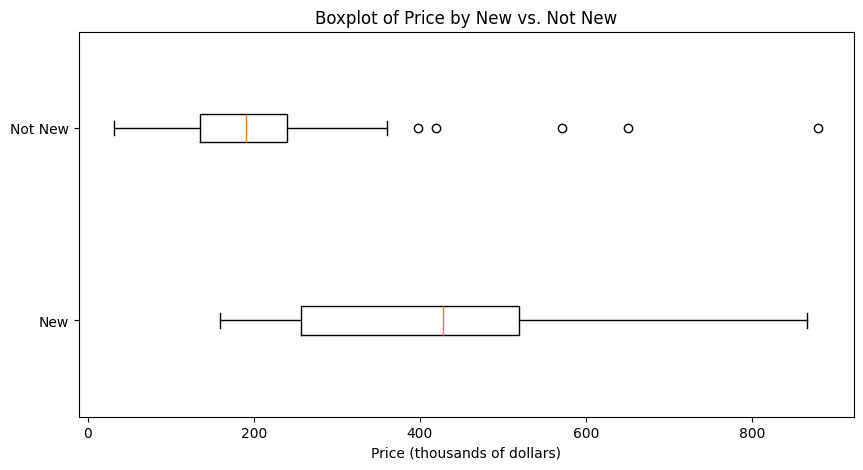

In [38]:
plt.figure(figsize=(10, 5))
houses_new = houses[houses["new"] == 1]["price"]
houses_old = houses[houses["new"] == 0]["price"]
plt.boxplot([houses_new, houses_old], vert=False, labels=["New", "Not New"])
plt.title('Boxplot of Price by New vs. Not New')
plt.xlabel('Price (thousands of dollars)')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

I feel like the quite obvious relationship is while the house is smaller the price is cheaper and when the house gets bigger in Sq/Ft the house gets for expensive. And for the new and old houses, I think theres a huge correlation to price and the newness of it. Looking at the boxplot you can see the obvious change in value when its new compared to old. People just want newer things and thats the market and home sellers take advantage of that market.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [39]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [40]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
contingency_table = pd.crosstab(happy['marital'], happy['happiness'])
print(contingency_table)

happiness    1  1     1  1     2  1     3    2  2     1  2     2  2     3  \
marital                                                                     
fe         348        0        0        0  642        0        0        0   
fem          0        5        0        0    0        0        0        0   
mal          0      107       33       56    0      229      114      210   
male         0       99        0        0    0        0        0        0   

happiness    3  3     1  3     2  3     3  
marital                                    
fe         153        0        0        0  
fem          0        0        0        0  
mal          0       33       45       68  
male         0        0        0        0  
